In [1]:
import mysql.connector
import pandas as pd

# MySQL 연결
remote = mysql.connector.connect(
    host="database-1.c3wcyagu0dve.ap-northeast-2.rds.amazonaws.com",
    port="3306",
    user="root",
    password="Rrnrrn1!",
    database="amrbase"
)

# 쿼리 실행 및 DataFrame으로 불러오기
query = "SELECT * FROM coffee_final;"
df = pd.read_sql(query, remote)

# 연결 닫기
remote.close()

# 데이터 확인
print(df.head())

  Brand   menu  price  Kcal  Caffeine
0   이디야  아메리카노   3200    16       158
1   이디야   카페라떼   4200   142       158
2   이디야   카페모카   4500   353       171
3  탐앤탐스  아메리카노   4600     5        97
4  탐앤탐스   카페라떼   5200   107        97


/tmp/ipykernel_179265/2215085166.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, remote)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import koreanize_matplotlib

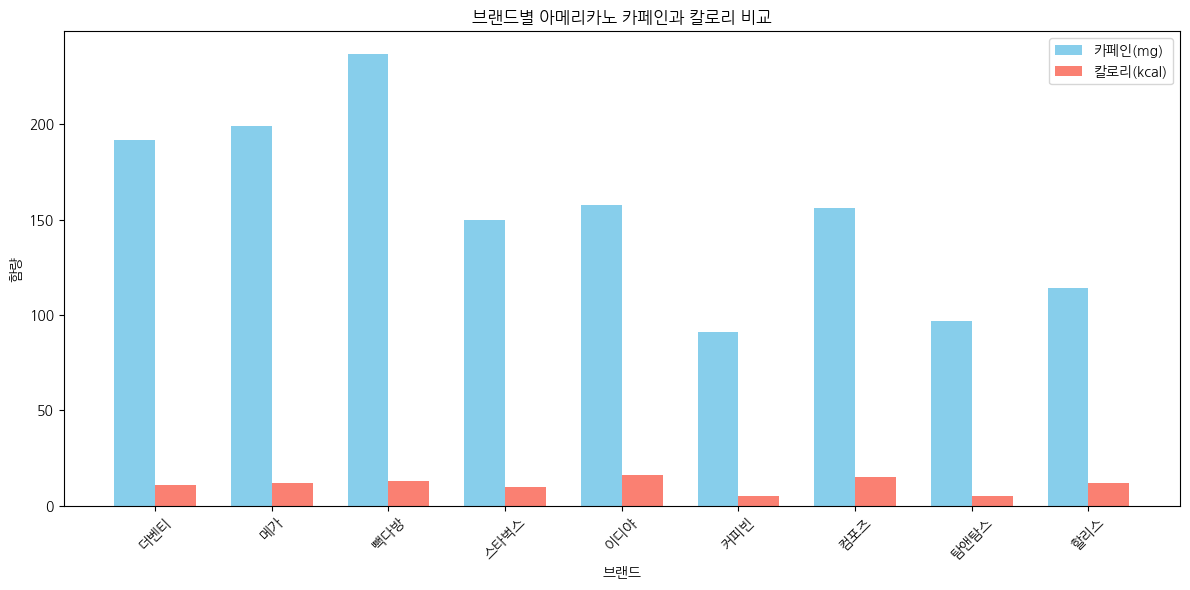

In [3]:
# 2. 아메리카노 필터링 및 평균 카페인 계산
americano = df[df['menu'] == '아메리카노']
avg = americano.groupby("Brand")[["Caffeine", "Kcal"]].mean()

# 4. 시각화 
x = avg.index
bar_width = 0.35
index = range(len(x))

plt.figure(figsize=(12, 6))
plt.bar(index, avg["Caffeine"], bar_width, label="카페인(mg)", color="skyblue")
plt.bar([i + bar_width for i in index], avg["Kcal"], bar_width, label="칼로리(kcal)", color="salmon")

plt.xlabel("브랜드")
plt.ylabel("함량")
plt.title("브랜드별 아메리카노 카페인과 칼로리 비교")
plt.xticks([i + bar_width/2 for i in index], x, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

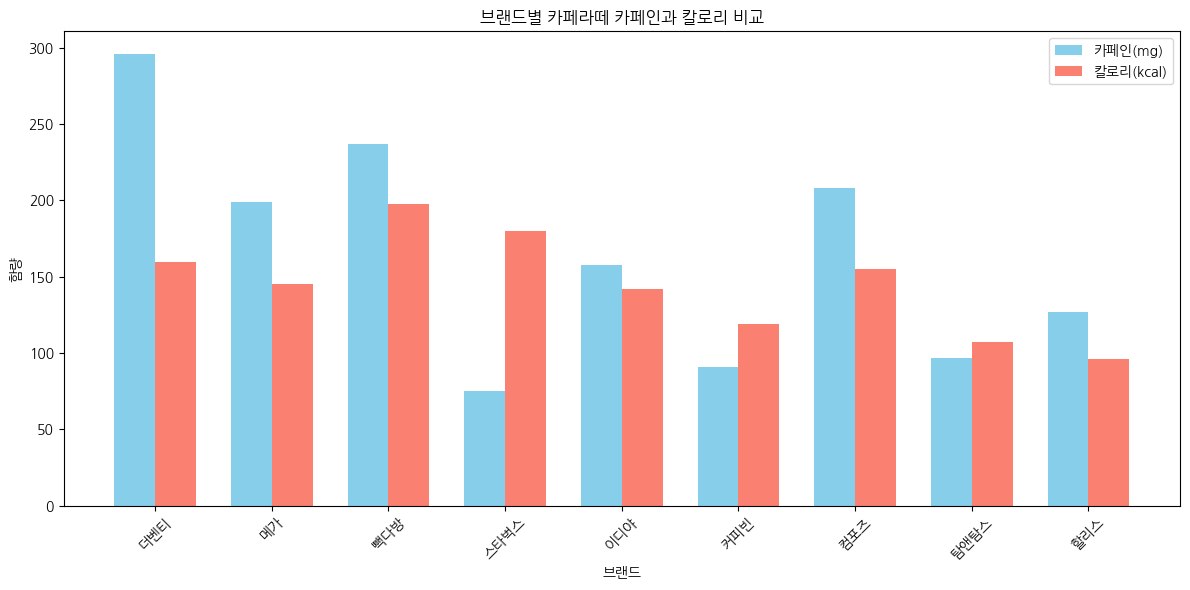

In [4]:
cafelatte = df[df['menu'] == '카페라떼']
avg = cafelatte.groupby("Brand")[["Caffeine", "Kcal"]].mean()

x = avg.index
bar_width = 0.35
index = range(len(x))

plt.figure(figsize=(12, 6))
plt.bar(index, avg["Caffeine"], bar_width, label="카페인(mg)", color="skyblue")
plt.bar([i + bar_width for i in index], avg["Kcal"], bar_width, label="칼로리(kcal)", color="salmon")

plt.xlabel("브랜드")
plt.ylabel("함량")
plt.title("브랜드별 카페라떼 카페인과 칼로리 비교")
plt.xticks([i + bar_width/2 for i in index], x, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

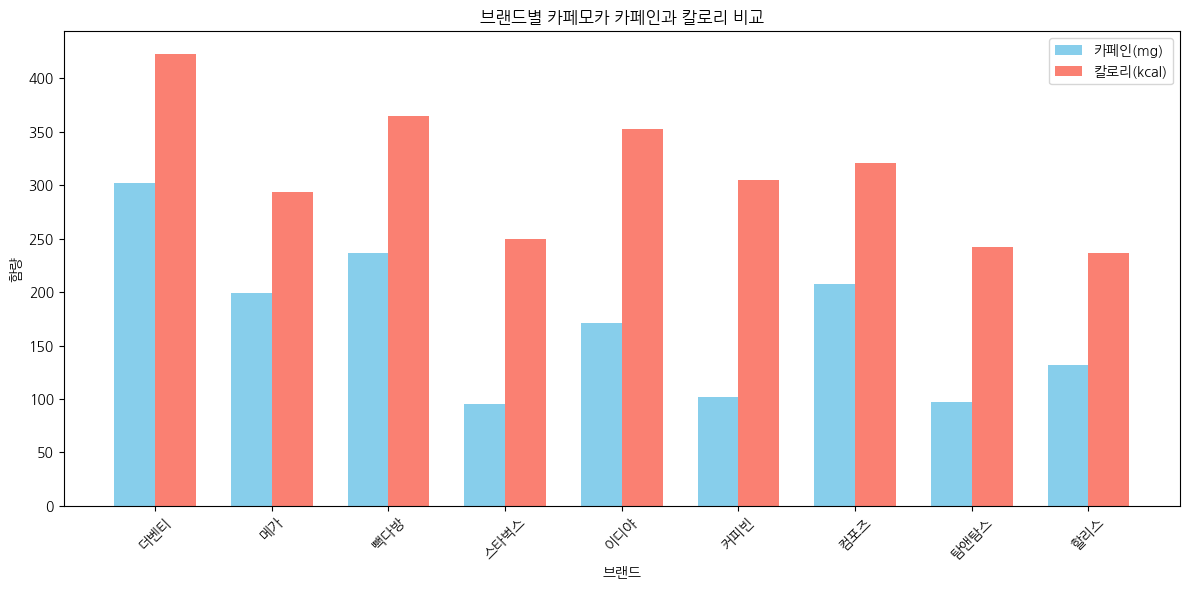

In [5]:
cafemoca = df[df['menu'] == '카페모카']
avg = cafemoca.groupby("Brand")[["Caffeine", "Kcal"]].mean()

x = avg.index
bar_width = 0.35
index = range(len(x))

plt.figure(figsize=(12, 6))
plt.bar(index, avg["Caffeine"], bar_width, label="카페인(mg)", color="skyblue")
plt.bar([i + bar_width for i in index], avg["Kcal"], bar_width, label="칼로리(kcal)", color="salmon")

plt.xlabel("브랜드")
plt.ylabel("함량")
plt.title("브랜드별 카페모카 카페인과 칼로리 비교")
plt.xticks([i + bar_width/2 for i in index], x, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_179265/3270290570.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(brands, rotation=45)


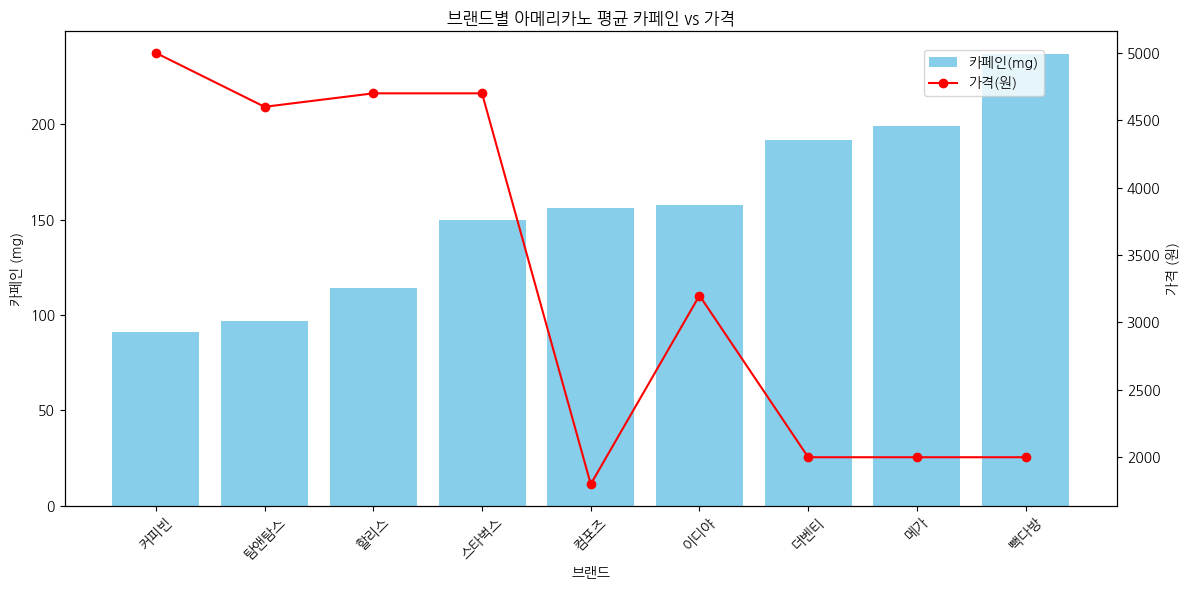

In [6]:
# 아메리카노 데이터만 필터링
americano = df[df['menu'] == '아메리카노']
avg = americano.groupby("Brand")[["Caffeine", "price"]].mean().sort_values("Caffeine")

fig, ax1 = plt.subplots(figsize=(12, 6))

# 카페인: 막대그래프
brands = avg.index
ax1.bar(brands, avg["Caffeine"], color="skyblue", label="카페인(mg)")
ax1.set_ylabel("카페인 (mg)")
ax1.set_xlabel("브랜드")
ax1.set_xticklabels(brands, rotation=45)

# 가격: 선그래프 (보조 y축)
ax2 = ax1.twinx()
ax2.plot(brands, avg["price"], color="red", marker="o", label="가격(원)")
ax2.set_ylabel("가격 (원)")

# 제목 및 범례
plt.title("브랜드별 아메리카노 평균 카페인 vs 가격")
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.88, 0.92))

plt.show()

/tmp/ipykernel_179265/3343396810.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(brands, rotation=45)


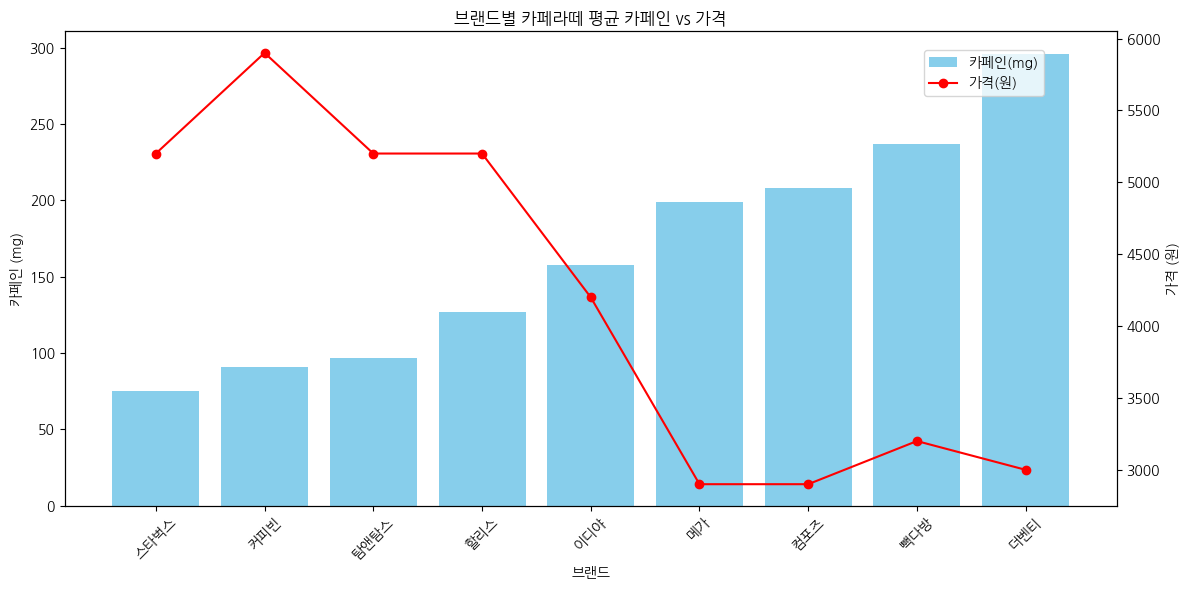

In [7]:
# 카페라떼 데이터만 필터링
cafelatte = df[df['menu'] == '카페라떼']
avg = cafelatte.groupby("Brand")[["Caffeine", "price"]].mean().sort_values("Caffeine")

fig, ax1 = plt.subplots(figsize=(12, 6))

# 카페인: 막대그래프
brands = avg.index
ax1.bar(brands, avg["Caffeine"], color="skyblue", label="카페인(mg)")
ax1.set_ylabel("카페인 (mg)")
ax1.set_xlabel("브랜드")
ax1.set_xticklabels(brands, rotation=45)

# 가격: 선그래프 (보조 y축)
ax2 = ax1.twinx()
ax2.plot(brands, avg["price"], color="red", marker="o", label="가격(원)")
ax2.set_ylabel("가격 (원)")

# 제목 및 범례
plt.title("브랜드별 카페라떼 평균 카페인 vs 가격")
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.88, 0.92))

plt.show()

/tmp/ipykernel_179265/4189318597.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(brands, rotation=45)


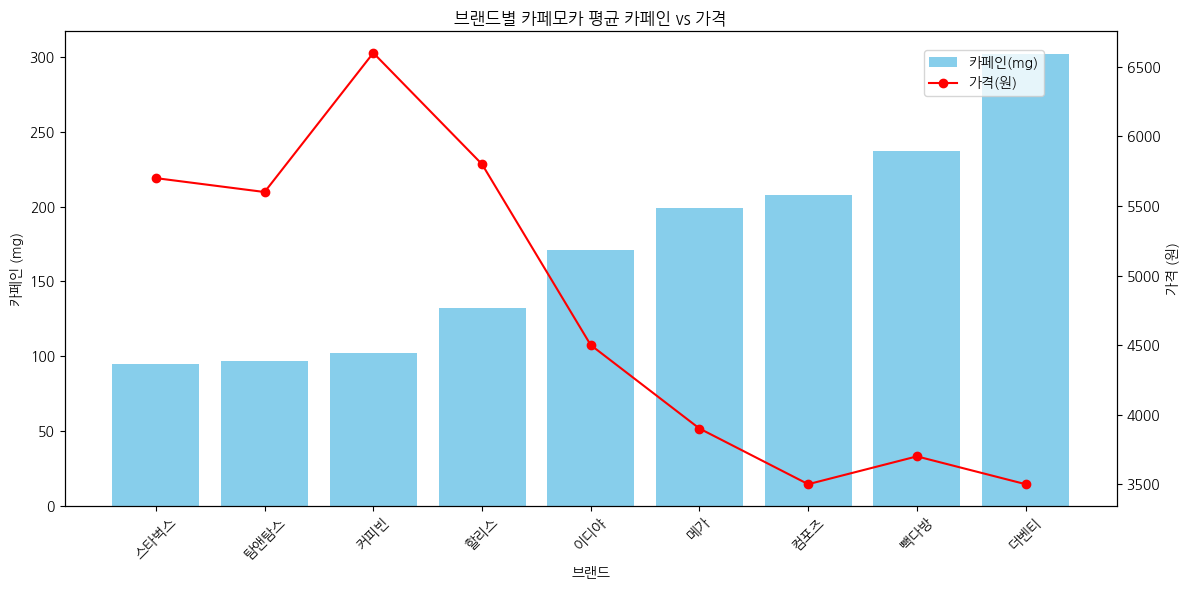

In [8]:
# 카페모카 데이터만 필터링
cafemoca = df[df['menu'] == '카페모카']
avg = cafemoca.groupby("Brand")[["Caffeine", "price"]].mean().sort_values("Caffeine")

fig, ax1 = plt.subplots(figsize=(12, 6))

# 카페인: 막대그래프
brands = avg.index
ax1.bar(brands, avg["Caffeine"], color="skyblue", label="카페인(mg)")
ax1.set_ylabel("카페인 (mg)")
ax1.set_xlabel("브랜드")
ax1.set_xticklabels(brands, rotation=45)

# 가격: 선그래프 (보조 y축)
ax2 = ax1.twinx()
ax2.plot(brands, avg["price"], color="red", marker="o", label="가격(원)")
ax2.set_ylabel("가격 (원)")

# 제목 및 범례
plt.title("브랜드별 카페모카 평균 카페인 vs 가격")
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.88, 0.92))

plt.show()

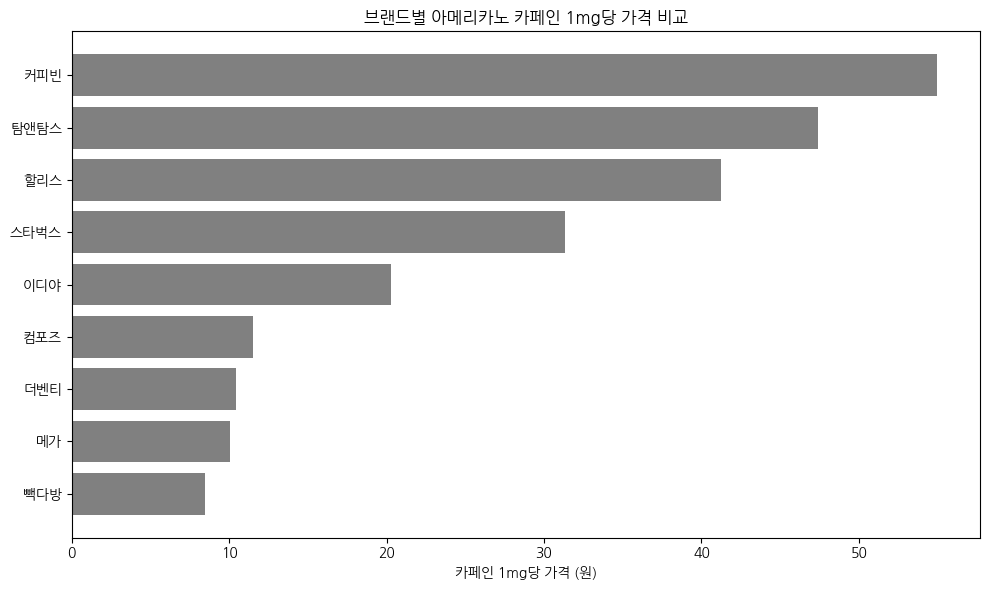

In [17]:
# 아메리카노만 선택하고 평균값 계산 
americano = df[df['menu'] == '아메리카노']
grouped = americano.groupby("Brand")[["price", "Caffeine"]].mean()

# 1mg당 가격 계산
grouped["원/mg"] = grouped["price"] / grouped["Caffeine"]
grouped = grouped.sort_values("원/mg")

plt.figure(figsize=(10,6))
plt.barh(grouped.index, grouped["원/mg"], color="gray")
plt.xlabel("카페인 1mg당 가격 (원)")
plt.title("브랜드별 아메리카노 카페인 1mg당 가격 비교")
plt.tight_layout()
plt.show()

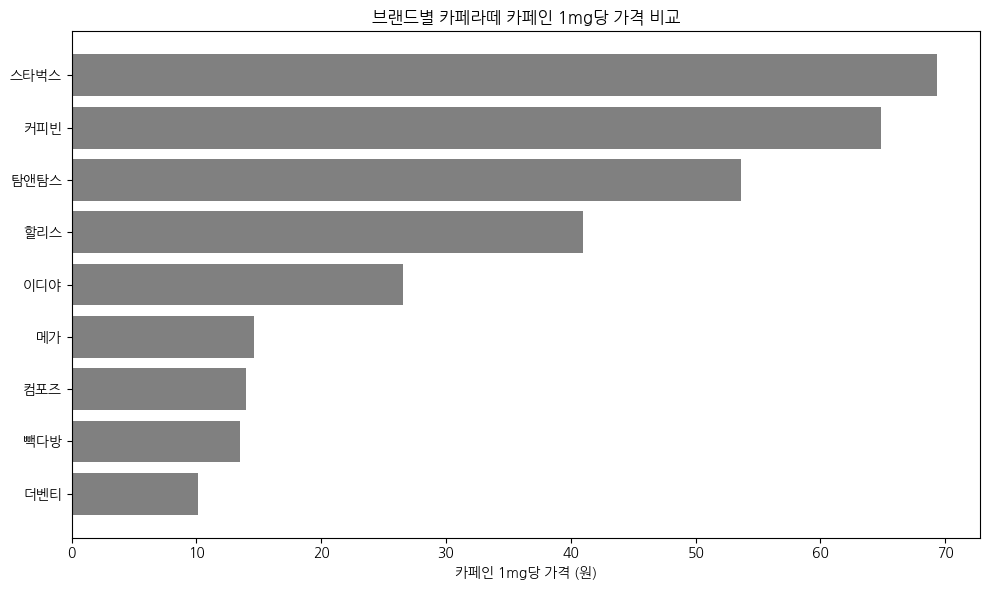

In [14]:
# 카페라떼만 선택하고 평균값 계산 
cafelatte = df[df['menu'] == '카페라떼']
grouped = cafelatte.groupby("Brand")[["price", "Caffeine"]].mean()

# 1mg당 가격 계산
grouped["원/mg"] = grouped["price"] / grouped["Caffeine"]
grouped = grouped.sort_values("원/mg")

plt.figure(figsize=(10,6))
plt.barh(grouped.index, grouped["원/mg"], color="gray")
plt.xlabel("카페인 1mg당 가격 (원)")
plt.title("브랜드별 카페라떼 카페인 1mg당 가격 비교")
plt.tight_layout()
plt.show()

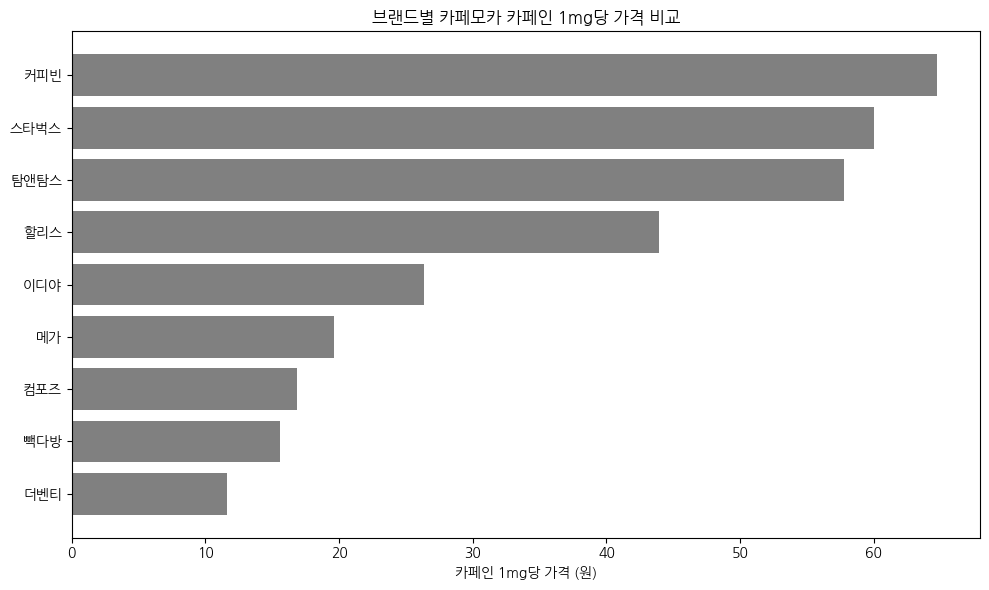

In [15]:
# 카페모카만 선택하고 평균값 계산 
cafemoca = df[df['menu'] == '카페모카']
grouped = cafemoca.groupby("Brand")[["price", "Caffeine"]].mean()

# 1mg당 가격 계산
grouped["원/mg"] = grouped["price"] / grouped["Caffeine"]
grouped = grouped.sort_values("원/mg")

plt.figure(figsize=(10,6))
plt.barh(grouped.index, grouped["원/mg"], color="gray")
plt.xlabel("카페인 1mg당 가격 (원)")
plt.title("브랜드별 카페모카 카페인 1mg당 가격 비교")
plt.tight_layout()
plt.show()